## Import the Relevant Libraries

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.0


In [3]:
from tensorflow import keras

In [4]:
import os

In [5]:
import pydicom

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
# import cv2

In [9]:
# from PIL import Image

In [10]:
import matplotlib.image as mpimg

In [47]:
import seaborn as sns

## Reading and Displaying Different DICOM Images to Understand the Metadata and Images Involved 

#### Image 1

In [12]:
dicom_path_1 = "RSNA_Mammograms/train_images/10006/462822612.dcm"

In [13]:
ds_1 = pydicom.dcmread(dicom_path_1)

In [14]:
print(ds_1)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.462822612
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.462822612
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.561976'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance U

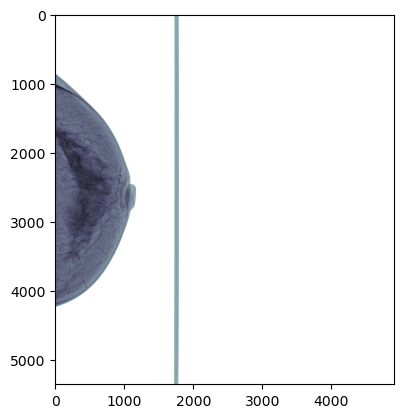

In [15]:
plt.imshow(ds_1.pixel_array, cmap=plt.cm.bone) 

#### Image 2

In [16]:
dicom_path_2 = "RSNA_Mammograms/train_images/9989/1078943060.dcm"

In [17]:
ds_2 = pydicom.dcmread(dicom_path_2)

In [18]:
print(ds_2)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.9989.1.1078943060
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.9989.1.1078943060
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '185555.545383'
(0010, 0020) Patient ID                          LO: '9989'
(0018, 11a0) Body Part Thickness                 DS: '57.0'
(0018

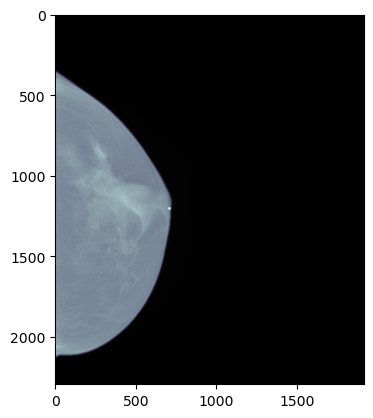

In [19]:
plt.imshow(ds_2.pixel_array, cmap=plt.cm.bone) 

### Image 3

In [20]:
dicom_path_3 = "RSNA_Mammograms/train_images/5/640805896.dcm"

In [21]:
ds_3 = pydicom.dcmread(dicom_path_3)

In [22]:
print(ds_3)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.5.1.640805896
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.5.1.640805896
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184950.680341'
(0010, 0020) Patient ID                          LO: '5'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.5
(0020, 000e) Series Instance UID              

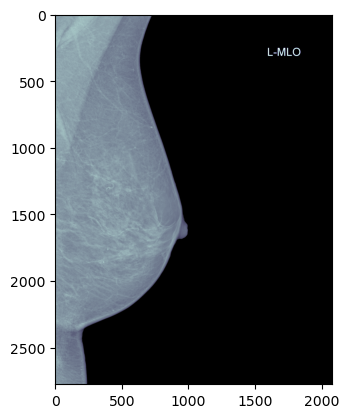

In [23]:
plt.imshow(ds_3.pixel_array, cmap=plt.cm.bone) 

## TensorFlow I/O's

Does not work - The kernel keeps on dying.

In [24]:
# import tensorflow_io as tfio

In [25]:
# Read the DICOM file
# dicom_image = tfio.image.decode_dicom_image(tf.io.read_file(dicom_path_3))

### DICOM Image Info

In [26]:
# ds_4 = pydicom.read_file(dicom_path_3)
ds_4 = pydicom.dcmread(dicom_path_3)

In [27]:
np_pixel_array = ds_4.pixel_array

In [28]:
np_pixel_array

array([[ 98, 100, 100, ...,   0,   0,   0],
       [ 96, 101, 100, ...,   0,   0,   0],
       [ 99, 102, 101, ...,   0,   0,   0],
       ...,
       [ 99,  97, 100, ...,   0,   0,   0],
       [103, 102,  99, ...,   0,   0,   0],
       [106, 104, 101, ...,   0,   0,   0]], dtype=uint16)

In [29]:
np_pixel_array.min()

0

In [30]:
np_pixel_array.max()

164

In [31]:
np_pixel_array.shape

(2776, 2082)

In [32]:
photometric_interpretation = ds_4.PhotometricInterpretation

In [33]:
print(f"Photometric Interpretation: {photometric_interpretation}")

Photometric Interpretation: MONOCHROME2


In [34]:
width = ds_4.Rows
width

2776

In [35]:
height = ds_4.Columns
height

2082

## Width, Height and Photometric Interpretation of DICOM Images

In [75]:
# Folder containing all the patient id’s with their DICOM images
data_dir = "RSNA_Mammograms/train_images"

In [76]:
# Get a list of all the patient id’s
data_folders = os.listdir(data_dir)

In [77]:
# Display only the first ten
data_folders[0:10]

['10006',
 '10011',
 '10025',
 '10038',
 '10042',
 '10048',
 '10049',
 '10050',
 '10051',
 '10086']

In [78]:
# Create empty list that will contain all the width diameters of the DICOM images
dim_x = []

# Create empty list that will contain all the height  diameters of the DICOM images
dim_y = [] 

# Create empty list that will contain all the Photometric Interpretation of the DICOM images
dim_colour = []

In [79]:
# Get a list of all folders in the specified directory 
for pt in data_folders:
    pt_folder = os.listdir(data_dir + "/" + pt)
    # print(pt_folder)

    # For each folder get the DICOM images 
    for dcm in pt_folder:
        # Create the full path
        full_path = os.path.join(data_dir + "/" + pt + "/" + dcm)
        # print(full_path)

        # Read each DICOM image
        ds = pydicom.dcmread(full_path)

        # Get the width, height and Photometric Interpretation of each image 
        width = ds.Rows
        height = ds.Columns
        colour = ds.PhotometricInterpretation

        # Check if the item is not in the list before appending
        # if width not in dim_x:
        #     dim_x.append(width)

        # if height not in dim_y:
        #     dim_y.append(height)

        # if colour not in dim_colour:
            # dim_colour.append(colour)

        # Append it to the relevant list
        dim_x.append(width)        dim_y.append(height)
        dim_colour.append(colour)

In [84]:
# Ensure that all images were read 
print(len(dim_x))
print(len(dim_y))
print(len(dim_colour))

54706
54706
54706


In [81]:
# Unique width values
unique_dim_x = list(set(dim_x))

print(unique_dim_x)

[3328, 4096, 2850, 4740, 5928, 2473, 5355, 1236, 3062, 2294, 2776]


In [82]:
# Unique height values
unique_dim_y = list(set(dim_y))

print(unique_dim_y)

[2560, 3328, 2082, 4915, 3540, 1022, 4728, 2394, 2045, 1914]


In [83]:
# Unique colour values
unique_dim_colour = list(set(dim_colour))

print(unique_dim_colour)

['MONOCHROME2', 'MONOCHROME1']


## Plot the Width and Height Distribution 

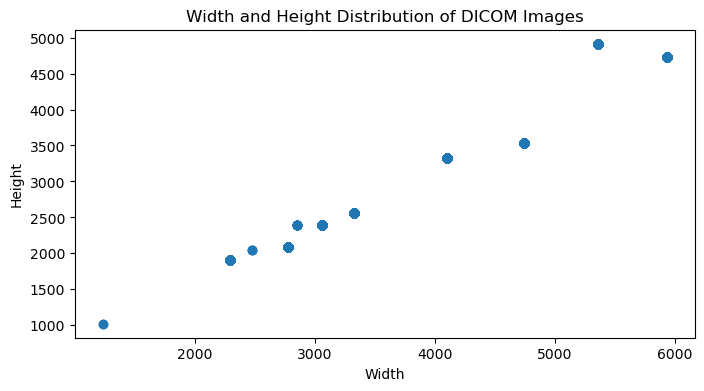

In [85]:
# Make the plot
fig = plt.figure(figsize = (8, 4))

# Plotting
plt.scatter(dim_x, dim_y)

# Adding labels and title
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Width and Height Distribution of DICOM Images")

# Show plot
plt.show()

In [86]:
# Calculate the mean width 
mean_width  = np.mean(dim_x)
print(mean_width)

3867.246737103791


In [87]:
# Calculate the mean height
mean_height  = np.mean(dim_y)
print(mean_height)

3173.1003911819544


## Directory where RSNA DICOM Images are Saved

In [ ]:
data_dir = "RSNA_Mammograms/train_images"

In [ ]:
# All the Patient_id’s Subfolders Containing the Images
os.listdir(data_dir)

## Resize using BICUBIC and Covert to PNG Format

In [ ]:
dicom_path_3 = "RSNA_Mammograms/train_images/5/640805896.dcm"

In [ ]:
dcB3 = pydicom.dcmread(dicom_path_3)

In [ ]:
plt.imshow(dcB3.pixel_array, cmap = "gray") 

In [ ]:
dcB1 = pydicom.dcmread(dicom_path_1)

In [ ]:
plt.imshow(dcB1.pixel_array, cmap = "gray") 

In [ ]:
# Convert DICOM to float32 numpy array
pixel_array = dcB3.pixel_array.astype(np.float32)
np.shape(pixel_array)

In [ ]:
pixel_array2 = dcB1.pixel_array.astype(np.float32)
np.shape(pixel_array2)

In [ ]:
# Convert numpy array to PIL Image
image = Image.fromarray(pixel_array)

In [ ]:
image2 = Image.fromarray(pixel_array2)

In [ ]:
# Resize the image
size = (512, 512)
# resized_image = image.resize(size, Image.LANCZOS)
resized_image = image.resize(size, Image.BICUBIC)
# resized_image = image.resize(size, Image.ADAPTIVE)

In [ ]:
resized_image2 = image2.resize(size, Image.BICUBIC)

In [ ]:
# Convert back to numpy array
resized_image_array = np.array(resized_image)

In [ ]:
resized_image_array2 = np.array(resized_image2)

In [ ]:
# Normalize the pixel values to the range 0-255
normalized_image_array = 255 * (resized_image_array - np.min(resized_image_array)) / (np.max(resized_image_array) - np.min(resized_image_array))

In [ ]:
normalized_image_array2 = 255 * (resized_image_array2 - np.min(resized_image_array2)) / (np.max(resized_image_array2) - np.min(resized_image_array2))

In [ ]:
# Convert to uint8
image_array_uint8 = normalized_image_array.astype(np.uint8)

In [ ]:
image_array_uint82 = normalized_image_array2.astype(np.uint8)

In [ ]:
# Convert the numpy array to a PIL Image
image = Image.fromarray(image_array_uint8)

In [ ]:
image2 = Image.fromarray(image_array_uint82)

In [ ]:
# image.save("PNG_Mammograms/test.png")
image.save("PNG_Mammograms/test1.png")
# image.save("PNG_Mammograms/test2.png")

In [ ]:
image2.save("PNG_Mammograms/test22.png")

In [ ]:
# Load the new PNG image
imagePNG = Image.open("PNG_Mammograms/test.png")

# Display the image
plt.imshow(imagePNG, cmap = "gray")
plt.show()

In [ ]:
# Load the new PNG image
imagePNG = Image.open("PNG_Mammograms/test1.png")

# Display the image
plt.imshow(imagePNG, cmap = "gray")
plt.show()

In [ ]:
# Load the new PNG image
imagePNG = Image.open("PNG_Mammograms/test2.png")

# Display the image
plt.imshow(imagePNG, cmap = "gray")
plt.show()

In [ ]:
# Load the new PNG image
imagePNG = Image.open("PNG_Mammograms/test22.png")

# Display the image
plt.imshow(imagePNG, cmap = "gray")
plt.show()

## Cut Off Empty Space from Images - DO NOT THINK SO

In [ ]:
# Read the PNG image using CV2
img_to_cut = cv2.imread("PNG_Mammograms/test22.png")

In [ ]:
# Detect regions of non-empty pixels
output = cv2.connectedComponentsWithStats((img_to_cut > 18).astype(np.uint8)[:, :, 0], 8, cv2.CV_32S)
print(output)

In [ ]:
# stats.shape == (N, 5), where N is the number of regions, 5 dimensions correspond to:
# left, top, width, height, area_size
stats = output[2]

In [ ]:
# finding max area which always corresponds to the breast data. 
idx = stats[1:, 4].argmax() + 1
x1, y1, w, h = stats[idx][:4]
x2 = x1 + w
y2 = y1 + h

In [ ]:
# cutting out the breast data
X_fit = img_to_cut[y1: y2, x1: x2]

In [ ]:
cv2.imwrite("PNG_Mammograms/test22Cut.png", X_fit[:, :, 0])

## Apply Median Filter

##### For salt and pepper removal

In [ ]:
# Load the image
image = cv2.imread("PNG_Mammograms/test1.png", cv2.IMREAD_UNCHANGED)

In [ ]:
# Apply a Gaussian blur filter
blurred_image = cv2.medianBlur(image, 3)

In [ ]:
# Save the processed image
cv2.imwrite("PNG_Mammograms/test1B.png", blurred_image)

## Apply Canny

##### For edge detection

In [ ]:
# Load the image
image = cv2.imread("PNG_Mammograms/test1.png", cv2.IMREAD_UNCHANGED)

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(image, 120, 100)

In [ ]:
# Save the processed image
cv2.imwrite("PNG_Mammograms/test1E2.png", edges)